In [ ]:
'''
Types of Probability Distribution
'''


# 1. Bernoulli Distribution


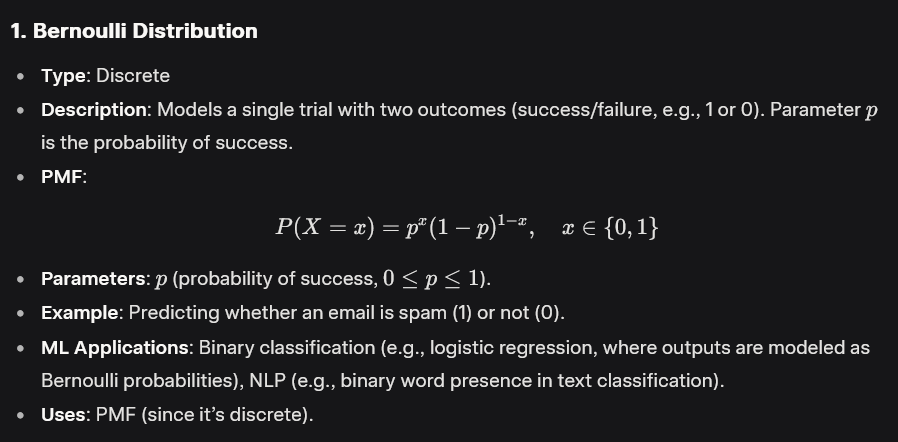


For a **Bernoulli distribution** with success probability `p`, the statistical properties are:

##### 🔸 Mean:
- $\mu$ = p

##### 🔸 Variance:
- $\sigma^2$ = p(1 - p)

##### 🔸 Median:
- 0 if \( p < 0.5 \)  
- 1 if \( p > 0.5 \)  
- Either 0 or 1 if \( p = 0.5 \)

##### 🔸 Mode:
- 0 if \( p < 0.5 \)  
- 1 if \( p > 0.5 \)  
- Both 0 and 1 if \( p = 0.5 \)

> ✅ The Bernoulli distribution models a single binary experiment (success/failure, yes/no, 1/0) and is a special case of the Binomial distribution with `n = 1`.


In [1]:
'''
Example code Bernoulli Dist
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
# define probability of success
p = 0.6

# bernolli outcomes
x = [0,1]

# PMF values
pmf = [bernoulli.pmf(k,p) for k in x]
pmf

[np.float64(0.4000000000000001), np.float64(0.6)]

Mean: 0.57
Median: 1.0
Mode: 1


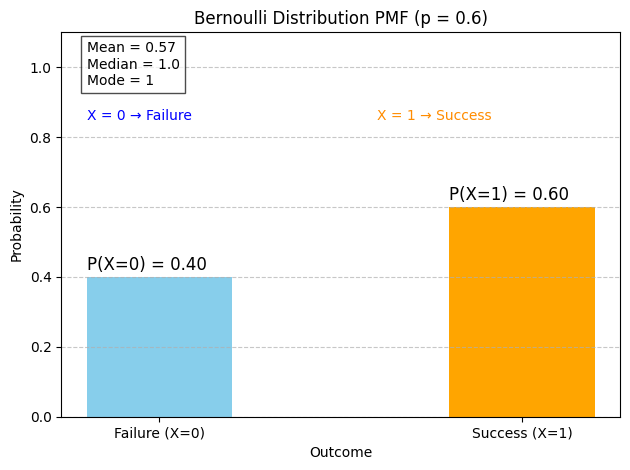

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, mode

# Define probability of success
p = 0.6

# Bernoulli outcomes: 0 and 1
x = [0, 1]
pmf = [bernoulli.pmf(k, p) for k in x]

# Generate 1000 samples for empirical stats
samples = bernoulli.rvs(p, size=1000)

# Calculate mean, median, mode
mean_val = np.mean(samples)
median_val = np.median(samples)
mode_val = mode(samples, keepdims=True).mode[0]

# Print them
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

# Plot PMF with annotation
plt.bar(x, pmf, width=0.4, color=['skyblue', 'orange'])
plt.xticks(x, ['Failure (X=0)', 'Success (X=1)'])
plt.title(f"Bernoulli Distribution PMF (p = {p})")
plt.xlabel('Outcome')
plt.ylabel('Probability')

# Annotate bars
for i, v in enumerate(pmf):
    plt.text(x[i] - 0.2, v + 0.02, f'P(X={x[i]}) = {v:.2f}', fontsize=12)

# Annotate meanings
plt.text(-0.2, 0.85, 'X = 0 → Failure', fontsize=10, color='blue')
plt.text(0.6, 0.85, 'X = 1 → Success', fontsize=10, color='darkorange')

# Show Mean, Median, Mode in plot
plt.text(-0.2, 0.95, f"Mean = {mean_val:.2f}\nMedian = {median_val}\nMode = {mode_val}", 
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Binomial Distribution

In [ ]:
'''
Binomial Distribution:

Definition:
    Discrete Probability distribution that models the number of successes in a fixed number of independent
    Bernoilli trials, each with the same probability of success

Type:
    Discrete Distribution (PMF)
    Models count data: number of successes in n trials

Parameters:
    n = number of trials = total number of experiments (fixed)
    p = prob. of success = prob. of success on a single trial
    q = 1-p = pro. of failure = Complement of success

Support:
    X ϵ {0,1,2,3,..,n}

Use case:
    A/B Testing: No of user who clicked on version A out of n users
    Quality Control : Number of defective items in a batch of size n
    Survey Sampling : Number of people who answered "yes" in a sample
    Sports Analytics : No of successful free throws in 10 attempts
'''


Mathematical Formula (PMF) for Binomial
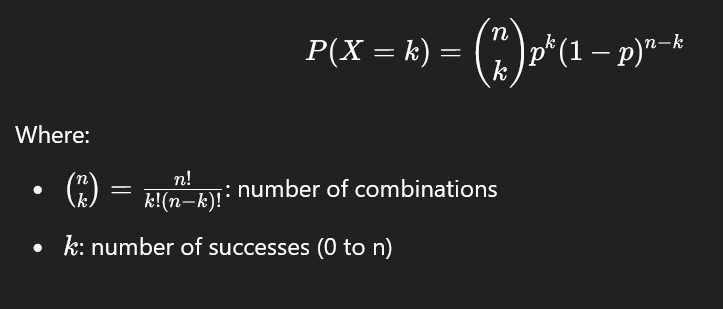
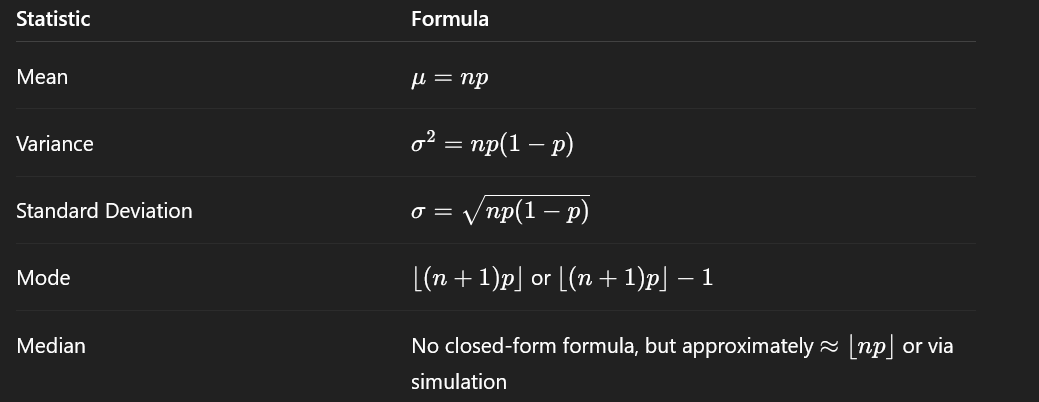

In [24]:
# Code example of Binomial Distribution:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,mode

n = 5
p = 0.5

#support range
x = np.arange(0,n+1)

#PMF (Prob. Mass Func)
pmf = binom.pmf(x,n,p)
pmf


array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [32]:
#stats
mean_val = binom.mean(n,p)
median_val = binom.median(n,p)
std_val = binom.std(n,p)
var_val = binom.var(n,p)

# Print stats
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Variance: {var_val}")
print(f"Standard Deviation: {std_val}")


Mean: 2.5
Median: 2.0
Variance: 1.25
Standard Deviation: 1.118033988749895


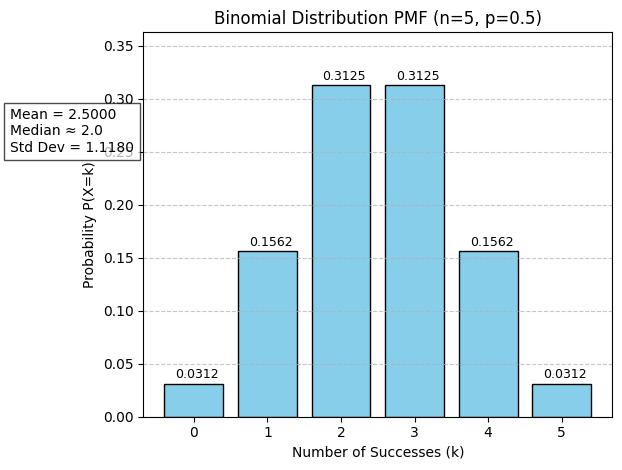

Q1. Prob. of getting exactly 3 heads in 5 flips? n=5, k=3 
-> then Pr(X=3) = PMF(X=3) = 0.3125 


In [33]:
# Plotting
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
for i, v in zip(x, pmf):
    plt.text(i-0.25, v+0.005, f'{v:.4f}', fontsize=9)

# Display stats on plot
plt.text(n/2 - 5, max(pmf)*0.8,
         f'Mean = {mean_val:.4f}\nMedian ≈ {median_val}\nStd Dev = {std_val:.4f}',
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(pmf) + 0.05)
plt.tight_layout()
plt.show()
print("Q1. Prob. of getting exactly 3 heads in 5 flips? n=5, k=3 " \
"\n-> ""then Pr(X=3) = PMF(X=3) = 0.3125 ")



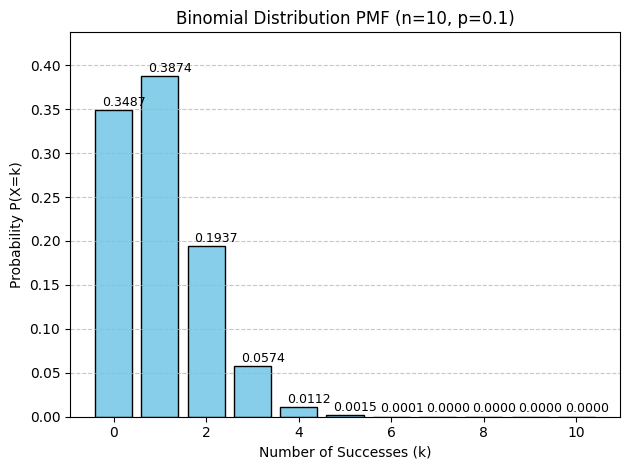

Q. Prob. of finding exactly 2 defective items in a sample of 10?
 Soln = P(X=2) = same formula = 0.1937


In [39]:
"""
Scenario. Inspecting 10 tems in a factory where each item has a 10% chance of being defective

n = 10
p = 0.1(being defective)
k = {0...10} (varies no of sucess)

Q. Prob. of finding exactly 2 defective items in a sample of 10?
Soln = P(X=2) = same form = 0.1937
"""
# Plotting
# Code example of Binomial Distribution:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,mode

n = 10
p = 0.1

#support range
x = np.arange(0,n+1)

#PMF (Prob. Mass Func)
pmf = binom.pmf(x,n,p)
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
for i, v in zip(x, pmf):
    plt.text(i-0.25, v+0.005, f'{v:.4f}', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(pmf) + 0.05)
plt.tight_layout()
plt.show()
print("Q. Prob. of finding exactly 2 defective items in a sample of 10?\
\n Soln = P(X=2) = same formula = 0.1937")



# 3. Poisson Distribution

In [ ]:
'''
Definition:
    models the number of times an event occurs in a fixed interval of time or space,
    independently and with a constant average rate

Type:
    Discrete prob. dist. (PMF)
    Nodels count-based rare events

Parameters:
    Rate = λ = Expected no of events per interval
    Support = x ϵ {0,1,2....} = Count of occurrences

Use cases:
    Call Center: No of call received an hour
    Web Analytics: No. of clicks per second 
    Natural Events: No of Earthquakes in a month
'''

# Mathematical formula (PMF):
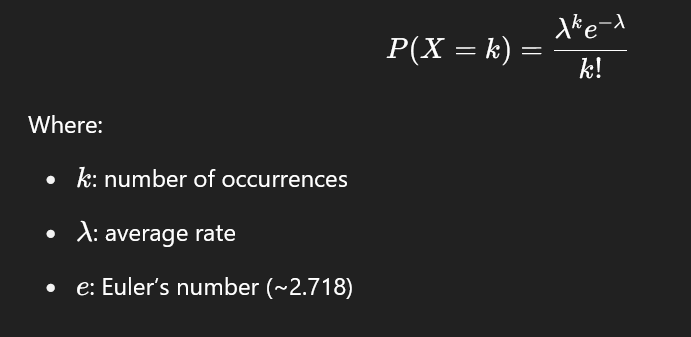
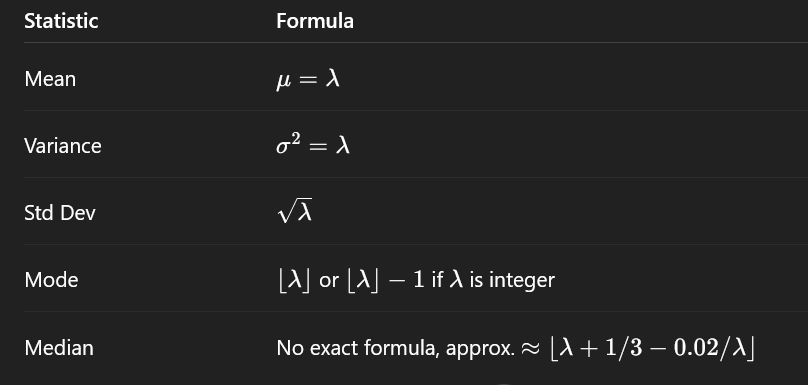

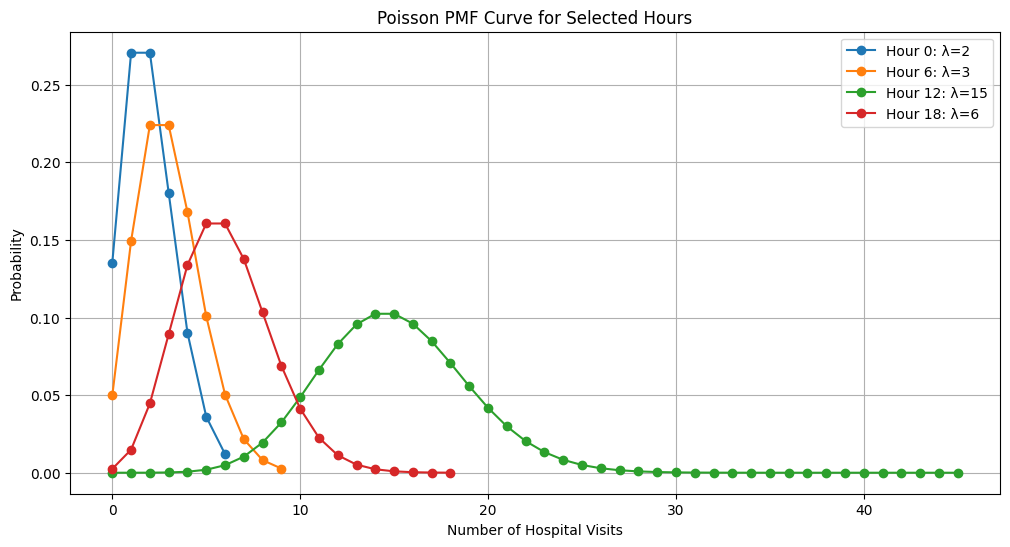

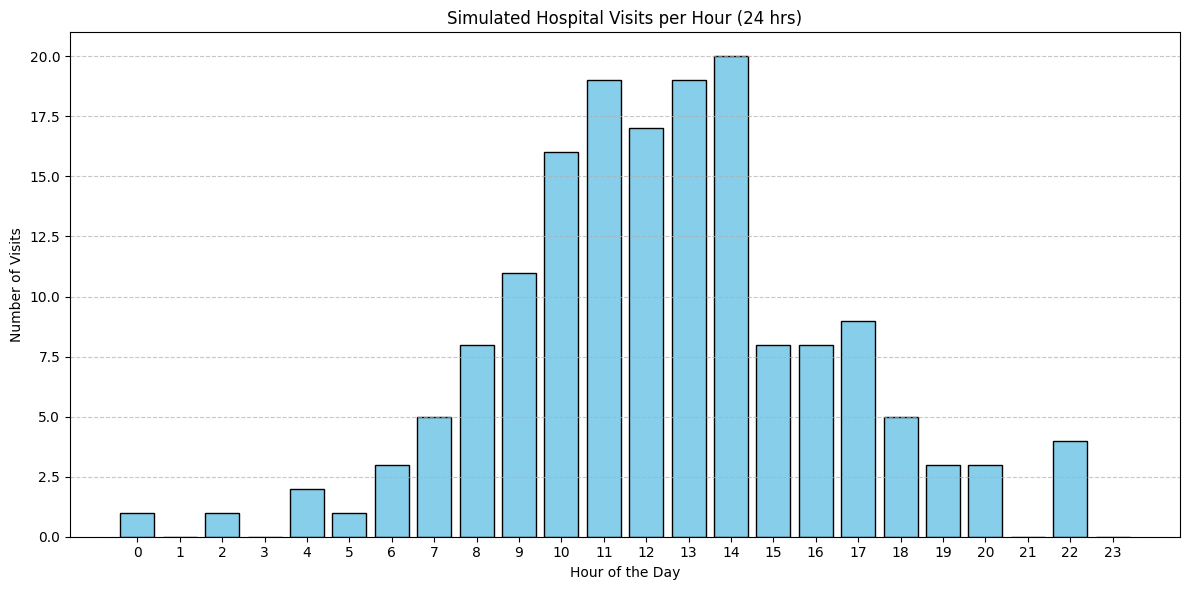

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define hours (24-hour format)
hours = np.arange(0, 24)

# Define lambda (λ) per hour (simulated hospital load)
# Lower λ at night, higher during the day
lambdas = np.array([
    2, 1, 1, 1, 1, 2, 3, 5, 7, 9, 10, 12, 15, 14, 12, 10, 9, 8, 6, 4, 3, 2, 2, 1
])

# Simulate hospital visits per hour using Poisson distribution
visits = poisson.rvs(mu=lambdas, size=24)

# --- PMF Curve Visualization ---
plt.figure(figsize=(12, 6))
for i in range(0, 24, 6):  # Plot PMF for 4 different hours
    x = np.arange(0, lambdas[i]*3 + 1)
    pmf = poisson.pmf(x, mu=lambdas[i])
    plt.plot(x, pmf, marker='o', label=f'Hour {i}: λ={lambdas[i]}')

plt.title('Poisson PMF Curve for Selected Hours')
plt.xlabel('Number of Hospital Visits')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# --- Histogram of Visits Across 24 Hours ---
plt.figure(figsize=(12, 6))
plt.bar(hours, visits, color='skyblue', edgecolor='black')
plt.xticks(hours)
plt.title('Simulated Hospital Visits per Hour (24 hrs)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Visits')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
'''
Explanation:
    Lambdas:
        Simulated visits rate per hour:
            a. low = 0am-5am (λ = 1-2)
            b. High = 10am-4pm (λ = 10-15)
            c. Tapers in evening
    PMF Curve:
        how λ affects distribution center and spread
        Sharp peak for low λ (late night)
        Wider, flatter curve for high λ (peak daytime hours)

    Histogram:
        visualizes actual simulated number of visits per hour
        daily hospital traffic pattern
'''

In [ ]:
'''
When to use Binomial and when to use Poisson:

| Feature          | Poisson             | Binomial            |
| ---------------- | ------------------- | ------------------- |
| Number of trials | Not fixed           | Fixed               |
| Probability      | Implied via λ       | Explicit `p`        |
| Events           | Count in time/space | Successes in trials |
| Good for         | Rare events         | Binary outcomes     |
'''

# 4. Normal/Gaussian Distribution

In [ ]:
'''
Normal Distribution (Gaussian):

Definition:
    - continuous probability distribution that is symmetric about the mean and 
      describes data that clusters around a central value.
    - Often called - bell curve 

Type:
    Continuous -> (PDF & CDF)
    Symmetric
    Unimodal (one peak)
    Defined over all real number x ∈ (−∞,∞)

Parameters:
    Mean = μ = Location of the center of the curve
    Std Dev = σ = Controls spread or width
    Variance = σ2 = Square of standard deviation

Properties (Empirical rule):
    Mean = Median = Mode

    This is visually called the 68–95–99.7 Rule.
    68% of data lies within ±1 standard deviation (σ) of the mean
    95% of data lies within μ ± 2σ
    99.7% of data lies within μ ± 3σ
    
    If variance increases - spread increases

Real-world Use Cases:
    IQ Scores = distributed around 100
    Heights/Weights = Normally distributed in a population
    Stock market returns = Approx. normality over longer periods

'''

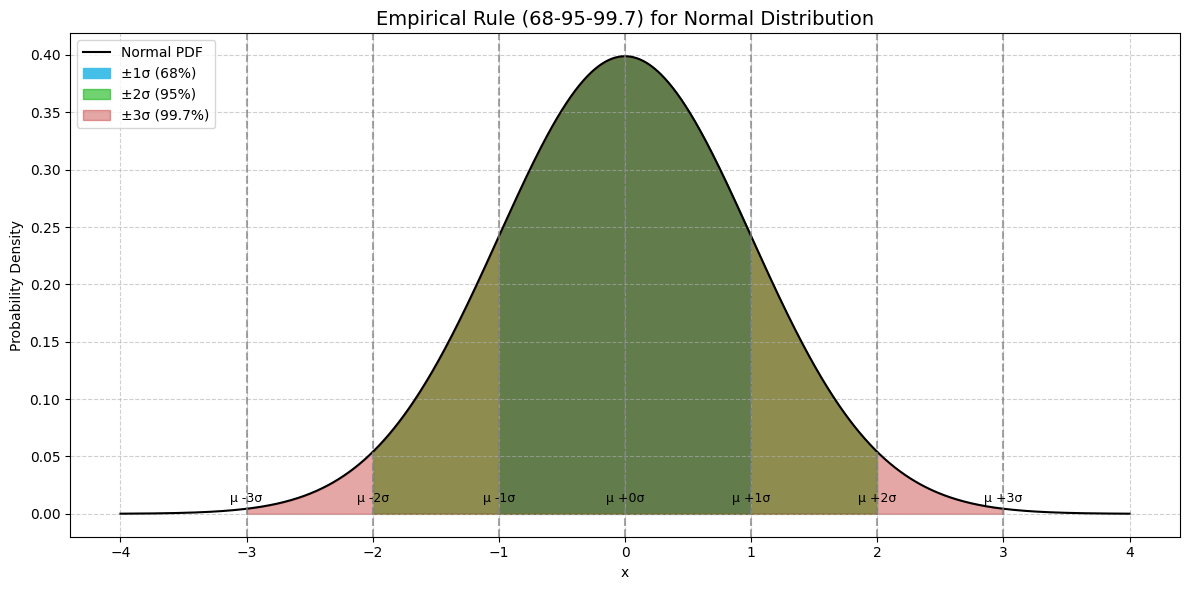

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Plot setup
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, color='black', label='Normal PDF')

# Fill between areas for 1σ, 2σ, 3σ
colors = ["#43bfe8", "#13b413", "#bd2320"]  # light blue, light green, light red

# ±1σ
plt.fill_between(x, pdf, where=(x >= mu - sigma) & (x <= mu + sigma),
                 color=colors[0], label='±1σ (68%)')
# ±2σ
plt.fill_between(x, pdf, where=(x >= mu - 2*sigma) & (x <= mu + 2*sigma),
                 color=colors[1], alpha=0.6, label='±2σ (95%)')
# ±3σ
plt.fill_between(x, pdf, where=(x >= mu - 3*sigma) & (x <= mu + 3*sigma),
                 color=colors[2], alpha=0.4, label='±3σ (99.7%)')

# Vertical lines at mean and standard deviations
for i in range(-3, 4):
    plt.axvline(mu + i*sigma, linestyle='--', color='gray', alpha=0.7)
    plt.text(mu + i*sigma, 0.01, f'μ {i:+}σ', ha='center', fontsize=9)

# Final plot formatting
plt.title('Empirical Rule (68-95-99.7) for Normal Distribution', fontsize=14)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Mathematical Formula (PDF)
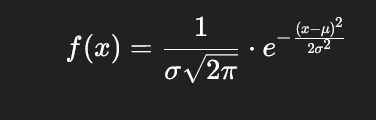

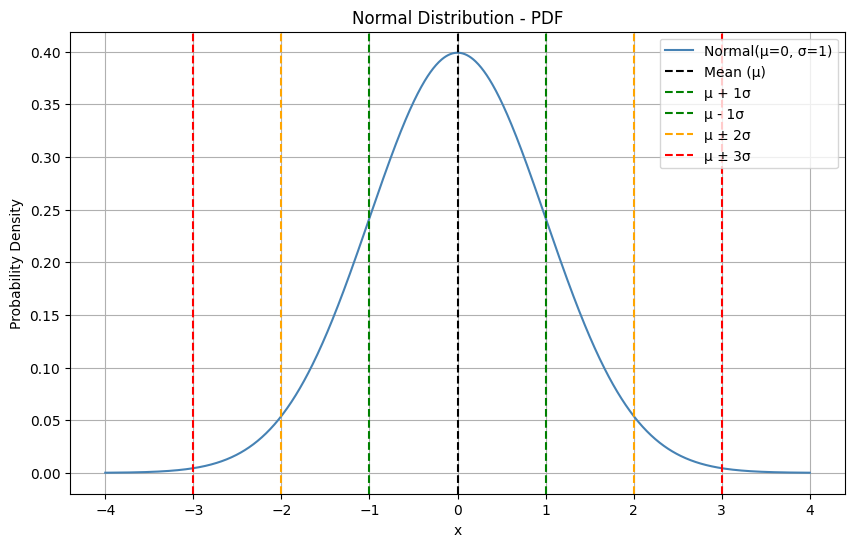

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0        # mean
sigma = 1     # standard deviation

# Create x range
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Plot PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='steelblue', label=f'Normal(μ={mu}, σ={sigma})')
plt.title('Normal Distribution - PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.axvline(mu, color='black', linestyle='--', label='Mean (μ)')
plt.axvline(mu + sigma, color='green', linestyle='--', label='μ + 1σ')
plt.axvline(mu - sigma, color='green', linestyle='--', label='μ - 1σ')
plt.axvline(mu + 2*sigma, color='orange', linestyle='--', label='μ ± 2σ')
plt.axvline(mu + 3*sigma, color='red', linestyle='--', label='μ ± 3σ')
plt.axvline(mu - 2*sigma, color='orange', linestyle='--')
plt.axvline(mu - 3*sigma, color='red', linestyle='--')
plt.legend()
plt.show()


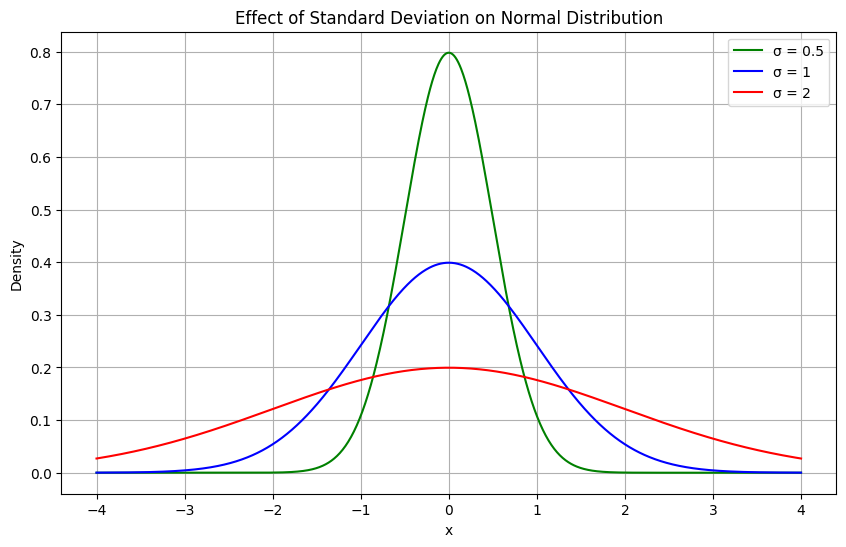

In [74]:
sigmas = [0.5, 1, 2]
colors = ['green', 'blue', 'red']

plt.figure(figsize=(10, 6))
for s, c in zip(sigmas, colors):
    plt.plot(x, norm.pdf(x, mu, s), label=f'σ = {s}', color=c)

plt.title('Effect of Standard Deviation on Normal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()


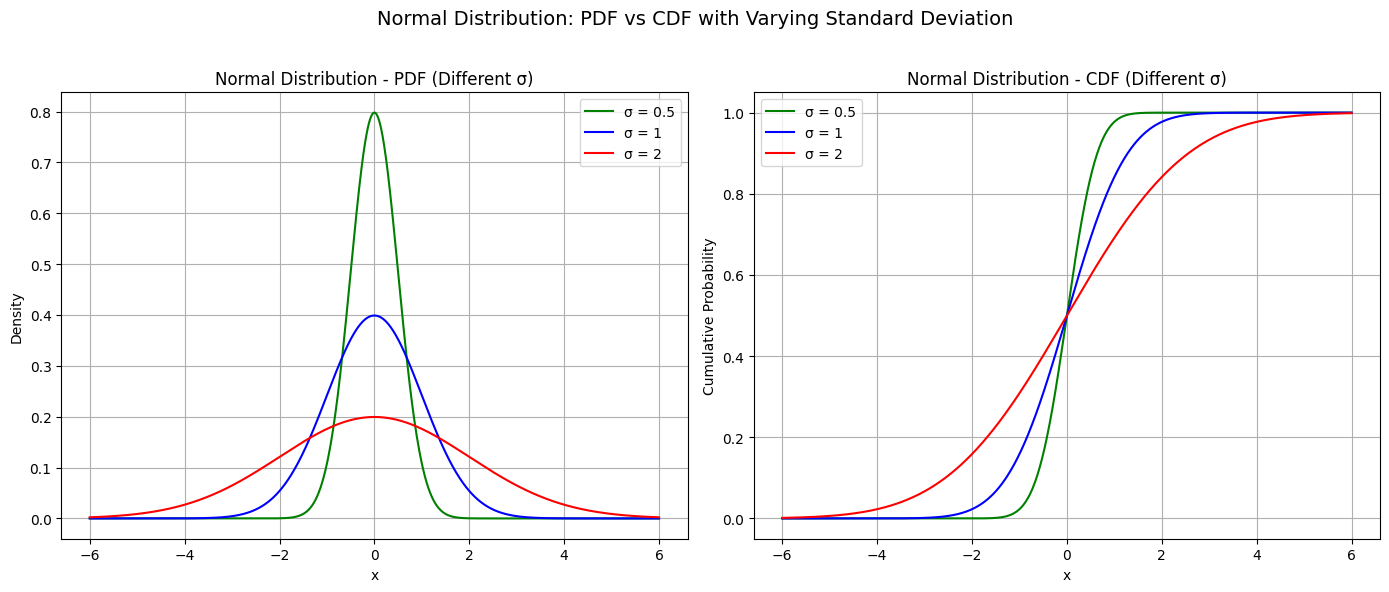

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Mean stays the same
mu = 0

# Different standard deviations
sigmas = [0.5, 1, 2]
colors = ['green', 'blue', 'red']
x = np.linspace(-6, 6, 1000)

# Plot PDF and CDF side-by-side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- PDF Plot ---
axs[0].set_title('Normal Distribution - PDF (Different σ)')
for sigma, color in zip(sigmas, colors):
    pdf = norm.pdf(x, mu, sigma)
    axs[0].plot(x, pdf, label=f'σ = {sigma}', color=color)
axs[0].set_xlabel('x')
axs[0].set_ylabel('Density')
axs[0].legend()
axs[0].grid(True)

# --- CDF Plot ---
axs[1].set_title('Normal Distribution - CDF (Different σ)')
for sigma, color in zip(sigmas, colors):
    cdf = norm.cdf(x, mu, sigma)
    axs[1].plot(x, cdf, label=f'σ = {sigma}', color=color)
axs[1].set_xlabel('x')
axs[1].set_ylabel('Cumulative Probability')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Normal Distribution: PDF vs CDF with Varying Standard Deviation', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
'''
PDF (Probability Density Function)
    Narrow peak for σ = 0.5 (less variance, data tightly around mean)
    Wider spread for σ = 2 (more variance, data more spread out)
    Area under each curve is 1, regardless of spread

CDF (Cumulative Distribution Function)
    Steeper rise near mean when σ is small
    Gradual rise when σ is large
    CDF reaches 1 slower with larger σ (spread)
'''

# 5. Standard Normal Distribution and Z Score

In [ ]:
'''
Standard Normal Distribution (SND) (Z-Distribution):
Definition:
    A special case of the normal distribution with mean (μ) = 0 and standard deviation (σ) = 1.
    Used for standardizing any normal distribution to compare across different scales.

Type:
    Continuous Probability Distribution (PDF & CDF)
    Standardized form of normal distribution

Parameters:
    Mean (μ) = 0
    Standard Deviation (σ) = 1
    Z-Score = (X - μ) / σ = Standardized value of X
    Support: X ϵ (−∞,∞)

Use Cases:
    Statistical inference: Hypothesis testing, confidence intervals
    Comparing different normal distributions
    Z-scores for standardized scores in tests (e.g., SAT, GRE)
    Quality control: Detecting outliers in manufacturing processes
    Commonly used in machine learning for feature scaling
    Calculating probabilities and confidence intervals

This makes it easier to calculate probabilities and percentiles using Z-tables or functions
like norm.cdf() and norm.ppf().
'''

In [ ]:
'''
Z-Score:
    Z = (X - μ) / σ
    Represents how many standard deviations X is away from the mean
    Used to standardize any normal distribution to the standard normal distribution

Z>0: X is above the mean
Z<0: X is below the mean
Z=0: X is equal to the mean

How to use Z-Score:
    Eg: Real-world example: SAT scores
    Suppose SAT scores are normally distributed with μ(A) = 600, μ(B) = 550,  σ(A) = 100, σ(B) = 20.
    If student A scores 650 and student B scores 550, their Z-scores would be:
    Z_A = (650 - 600) / 100 = 0.5
    Z_B = (650 - 550) / 20 = 5
    This means student A scored 0.5 standard deviations above the mean, 
    while student B scored 5 standard deviations above the mean.
    Student B performed better with respect to student A.
    This allows us to compare their relative performance on the same scale.
'''

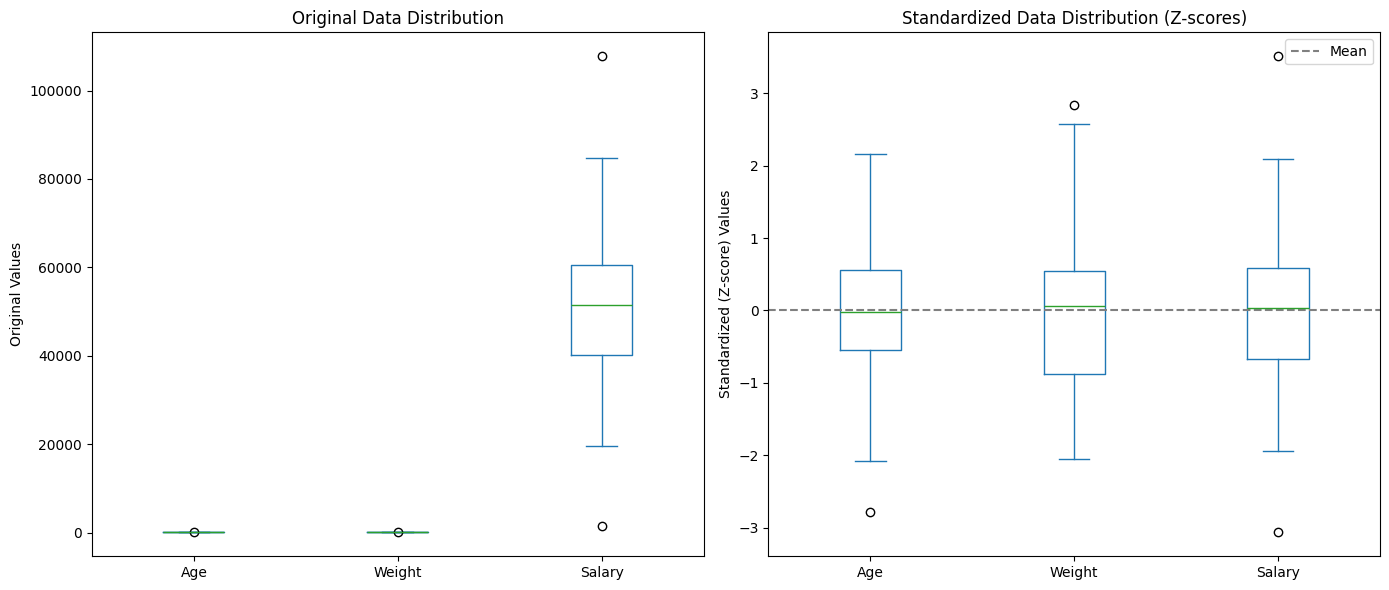

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Create a sample dataset
np.random.seed(42)
data = {
    'Age': np.random.normal(35, 10, 100),         # Mean 35, std 10
    'Weight': np.random.normal(70, 15, 100),      # Mean 70kg, std 15
    'Salary': np.random.normal(50000, 15000, 100) # Mean $50k, std $15k
}
df = pd.DataFrame(data)

# Step 2: Apply Z-score standardization
scaler = StandardScaler()
standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized, columns=['Age', 'Weight', 'Salary'])

# Step 3: Plot original vs standardized
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original distributions
df.plot(kind='box', ax=axes[0], title='Original Data Distribution')
axes[0].set_ylabel('Original Values')

# Standardized distributions
df_standardized.plot(kind='box', ax=axes[1], title='Standardized Data Distribution (Z-scores)')
axes[1].set_ylabel('Standardized (Z-score) Values')
axes[1].axhline(0, linestyle='--', color='gray', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()
# output here is a side-by-side comparison of the original and standardized data distributions.
# which shows how the Z-score standardization transforms the data to have a mean of 0 and a standard deviation of 1.
# in original data salary  have much higher values than age and weight,
# while in standardized data, all features are on the same scale.
